In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='eaf2da22-67e5-4cb7-9e74-8c008d831d42', project_access_token='p-e10baaf23dfcc50b7aa7730ce97bc2285ab32a19')
pc = project.project_context


In [ ]:
# Insira seu project token aqui


# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [2]:
!pip install scikit-learn --upgrade

     |████████████████████████████████| 6.8MB 6.9MB/s eta 0:00:01
     |████████████████████████████████| 307kB 41.0MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [3]:
!pip install xgboost --upgrade

     |████████████████████████████████| 148.9MB 48.5MB/s eta 0:00:01MB 8.6MB/s eta 0:00:13


In [4]:
!pip install imblearn --upgrade

     |████████████████████████████████| 174kB 5.9MB/s eta 0:00:01


<hr>

## Download dos conjuntos de dados em formato .csv

In [5]:
import pandas as pd

In [8]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_aae4ea247eba467f9f5e1751a69700cd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OxZSDLolMTkb3PF-HQMbnEggMnompvbQKHcfgTyHplJo',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_aae4ea247eba467f9f5e1751a69700cd.get_object(Bucket='desafio7-donotdelete-pr-mjose7a3gb8ama',Key='training_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
0,2018-6-17,Paraíso,-23.57677,-46.63933,71284,10,37,18,23,7,22,33,8,REABASTECER,167
1,2019-9-5,Paraíso,-23.57677,-46.63933,72460,58,12,38,3,43,10,18,5,REABASTECER,605
2,2019-9-13,Paraíso,-23.57677,-46.63933,71020,67,36,50,16,10,30,30,18,NORMAL,613
3,2018-7-6,Paraíso,-23.57677,-46.63933,70563,78,39,13,17,26,4,43,13,NORMAL,186
4,2018-12-17,Paraíso,-23.57677,-46.63933,72995,42,53,25,32,10,34,38,15,NORMAL,347


In [9]:
df_training_dataset = df_data_1
df_training_dataset.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
16761,2018-9-12,Luz,-23.5365,-46.6332,127141,11,32,33,38,17,26,43,40,REABASTECER,11052
16762,2019-5-25,Ana Rosa,-23.5813,-46.6383,67188,67,9,65,38,28,43,6,2,REABASTECER,12025
16763,2019-6-24,Ana Rosa,-23.5813,-46.6383,64995,46,49,51,35,33,37,19,17,NORMAL,12054
16764,2018-9-25,São Joaquim,-23.5618,-46.6389,33082,62,47,34,8,25,43,43,5,REABASTECER,12505
16765,2018-3-4,São Judas,-23.6255,-46.6411,15307,78,33,44,40,43,25,32,24,NORMAL,13024


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os pontos de vendas da TNT:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [10]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16766 entries, 0 to 16765
Data columns (total 15 columns):
Tempo           16766 non-null object
Estação         16766 non-null object
LAT             16766 non-null float64
LONG            16766 non-null float64
Movimentação    16766 non-null int64
Original_473    16766 non-null int64
Original_269    16766 non-null int64
Zero            16766 non-null int64
Maçã-Verde      16766 non-null int64
Tangerina       16766 non-null int64
Citrus          16766 non-null int64
Açaí-Guaraná    16766 non-null int64
Pêssego         16766 non-null int64
TARGET          16766 non-null object
row             16766 non-null int64
dtypes: float64(2), int64(10), object(3)
memory usage: 1.9+ MB


In [11]:
df_training_dataset.nunique()

Tempo             720
Estação            25
LAT                25
LONG               25
Movimentação    14695
Original_473       81
Original_269       65
Zero               63
Maçã-Verde         43
Tangerina          42
Citrus             43
Açaí-Guaraná       42
Pêssego            42
TARGET              2
row             16766
dtype: int64

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [13]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
row             0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
row             0
dtype: int64



### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [14]:
df_training_dataset_imputed.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
16761,2018-9-12,Luz,-23.5365,-46.6332,127141,11,32,33,38,17,26,43,40,REABASTECER,11052
16762,2019-5-25,Ana Rosa,-23.5813,-46.6383,67188,67,9,65,38,28,43,6,2,REABASTECER,12025
16763,2019-6-24,Ana Rosa,-23.5813,-46.6383,64995,46,49,51,35,33,37,19,17,NORMAL,12054
16764,2018-9-25,São Joaquim,-23.5618,-46.6389,33082,62,47,34,8,25,43,43,5,REABASTECER,12505
16765,2018-3-4,São Judas,-23.6255,-46.6411,15307,78,33,44,40,43,25,32,24,NORMAL,13024


In [15]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

In [16]:
df_training_dataset_rmcolumns.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
16761,11,32,33,38,17,26,43,40,REABASTECER,11052
16762,67,9,65,38,28,43,6,2,REABASTECER,12025
16763,46,49,51,35,33,37,19,17,NORMAL,12054
16764,62,47,34,8,25,43,43,5,REABASTECER,12505
16765,78,33,44,40,43,25,32,24,NORMAL,13024


# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [17]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
# df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Variável a ser aplicado método getDumies()'])
df_training = df_training_dataset_rmcolumns
df_training.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
16761,11,32,33,38,17,26,43,40,REABASTECER,11052
16762,67,9,65,38,28,43,6,2,REABASTECER,12025
16763,46,49,51,35,33,37,19,17,NORMAL,12054
16764,62,47,34,8,25,43,43,5,REABASTECER,12505
16765,78,33,44,40,43,25,32,24,NORMAL,13024


# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [18]:
df_training.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'TARGET', 'row'],
      dtype='object')

In [19]:
features = df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
]
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [20]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=133)

### Treinando uma árvore de decisão

In [21]:
# Método para criar um árvore de decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_leaf=2, min_samples_split=100,
                       n_estimators=300, random_state=1)

### Fazendo previsões na amostra de teste

In [22]:
y_pred = dtc.predict(X_test)
print(y_pred)

y_pred_rf = rfc.predict(X_test)
print(y_pred_rf)


['NORMAL' 'NORMAL' 'NORMAL' ... 'NORMAL' 'NORMAL' 'NORMAL']
['NORMAL' 'NORMAL' 'NORMAL' ... 'NORMAL' 'NORMAL' 'REABASTECER']


### Analisando a qualidade do modelo através da matriz de confusão

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

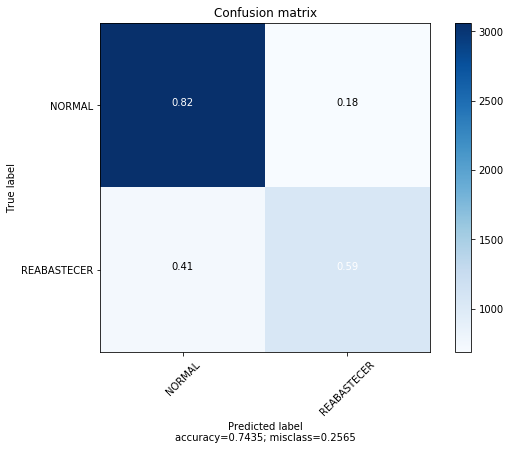

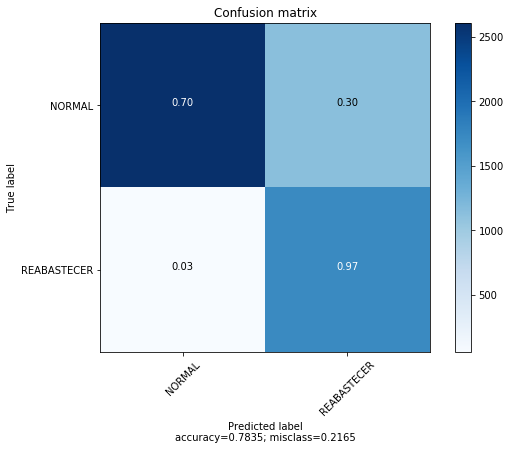

In [24]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), ['NORMAL', 'REABASTECER'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [25]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-10 11:36:09--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv’

    [ <=>                                   ] 70,291      --.-K/s   in 0.002s  

2020-09-10 11:36:09 (37.7 MB/s) - ‘to_be_scored.csv’ saved [70291]



,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


In [26]:
df_to_be_scored = pd.read_csv('to_be_scored.csv')
df_to_be_scored.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [27]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
Tempo           984 non-null object
Estação         984 non-null object
LAT             984 non-null float64
LONG            984 non-null float64
Movimentação    984 non-null int64
Original_473    984 non-null int64
Original_269    984 non-null int64
Zero            984 non-null int64
Maçã-Verde      984 non-null int64
Tangerina       984 non-null int64
Citrus          984 non-null int64
Açaí-Guaraná    984 non-null int64
Pêssego         984 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 100.0+ KB


<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [28]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,34,65,28,17,33,27,6,2
980,21,60,18,15,27,22,43,43
981,9,56,13,14,21,17,37,37
982,86,49,7,14,17,12,33,33
983,74,41,65,8,14,7,27,27


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [29]:
df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
].columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

In [30]:
df_to_be_scored_4.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [31]:
y_pred = rfc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
979,34,65,28,17,33,27,6,2,REABASTECER
980,21,60,18,15,27,22,43,43,NORMAL
981,9,56,13,14,21,17,37,37,REABASTECER
982,86,49,7,14,17,12,33,33,REABASTECER
983,74,41,65,8,14,7,27,27,NORMAL


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [32]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'desafio7-donotdelete-pr-mjose7a3gb8ama',
 'asset_id': '78c6932b-1c26-4820-bef7-dd446059632e'}

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
